In [5]:
import numpy as np 
import pandas as pd
from tensorflow import keras
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [11]:
batch_size  = 128
picture_size = 48
folder_path=r'/kaggle/input/cat-breeds-dataset/images/'
datagen  = ImageDataGenerator(validation_split=0.2,rescale=1./255)
#datagen_val = ImageDataGenerator()

train_set = datagen.flow_from_directory(folder_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True,
                                              subset='training',
                                              classes=["Bengal", "Calico","Burmese", "Himalayan", "Munchkin", "Ragdoll", "Siberian", "British shorthair", "Russian Blue", "Dilute Calico"]
                                             )


test_set = datagen.flow_from_directory(folder_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False,
                                              subset='validation',
                                              classes=["Bengal", "Calico","Burmese", "Himalayan", "Munchkin", "Ragdoll", "Siberian", "British shorthair", "Russian Blue", "Dilute Calico"]
                                          )


Found 12587 images belonging to 10 classes.
Found 3142 images belonging to 10 classes.


Filtered out the given classes from the dataset.


["Bengal", "Calico","Burmese", "Himalayan", "Munchkin", "Ragdoll", "Siberian", "British shorthair", "Russian Blue", "Dilute Calico"]

In [7]:
from keras.optimizers import Adam,SGD,RMSprop
from keras.models import Sequential 

no_of_classes = 10

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [8]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [12]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )


Epoch 1/20
98/98 [==============================] - 359s 4s/step - loss: 1.8135 - accuracy: 0.3424 - val_loss: 2.9552 - val_accuracy: 0.1217
Epoch 2/20
98/98 [==============================] - 344s 4s/step - loss: 1.6480 - accuracy: 0.3942 - val_loss: 3.0913 - val_accuracy: 0.1735
Epoch 3/20
98/98 [==============================] - 345s 4s/step - loss: 1.5606 - accuracy: 0.4337 - val_loss: 2.8271 - val_accuracy: 0.1735
Epoch 4/20
98/98 [==============================] - 344s 4s/step - loss: 1.4759 - accuracy: 0.4640 - val_loss: 2.6556 - val_accuracy: 0.1735
Epoch 5/20
98/98 [==============================] - 344s 4s/step - loss: 1.4175 - accuracy: 0.4867 - val_loss: 2.3533 - val_accuracy: 0.1735
Epoch 6/20
98/98 [==============================] - 344s 4s/step - loss: 1.3599 - accuracy: 0.5109 - val_loss: 2.1993 - val_accuracy: 0.2360
Epoch 7/20
98/98 [==============================] - 347s 4s/step - loss: 1.2986 - accuracy: 0.5319 - val_loss: 2.6042 - val_accuracy: 0.1963
Epoch 8/20
98

Got around 70% accuracy.

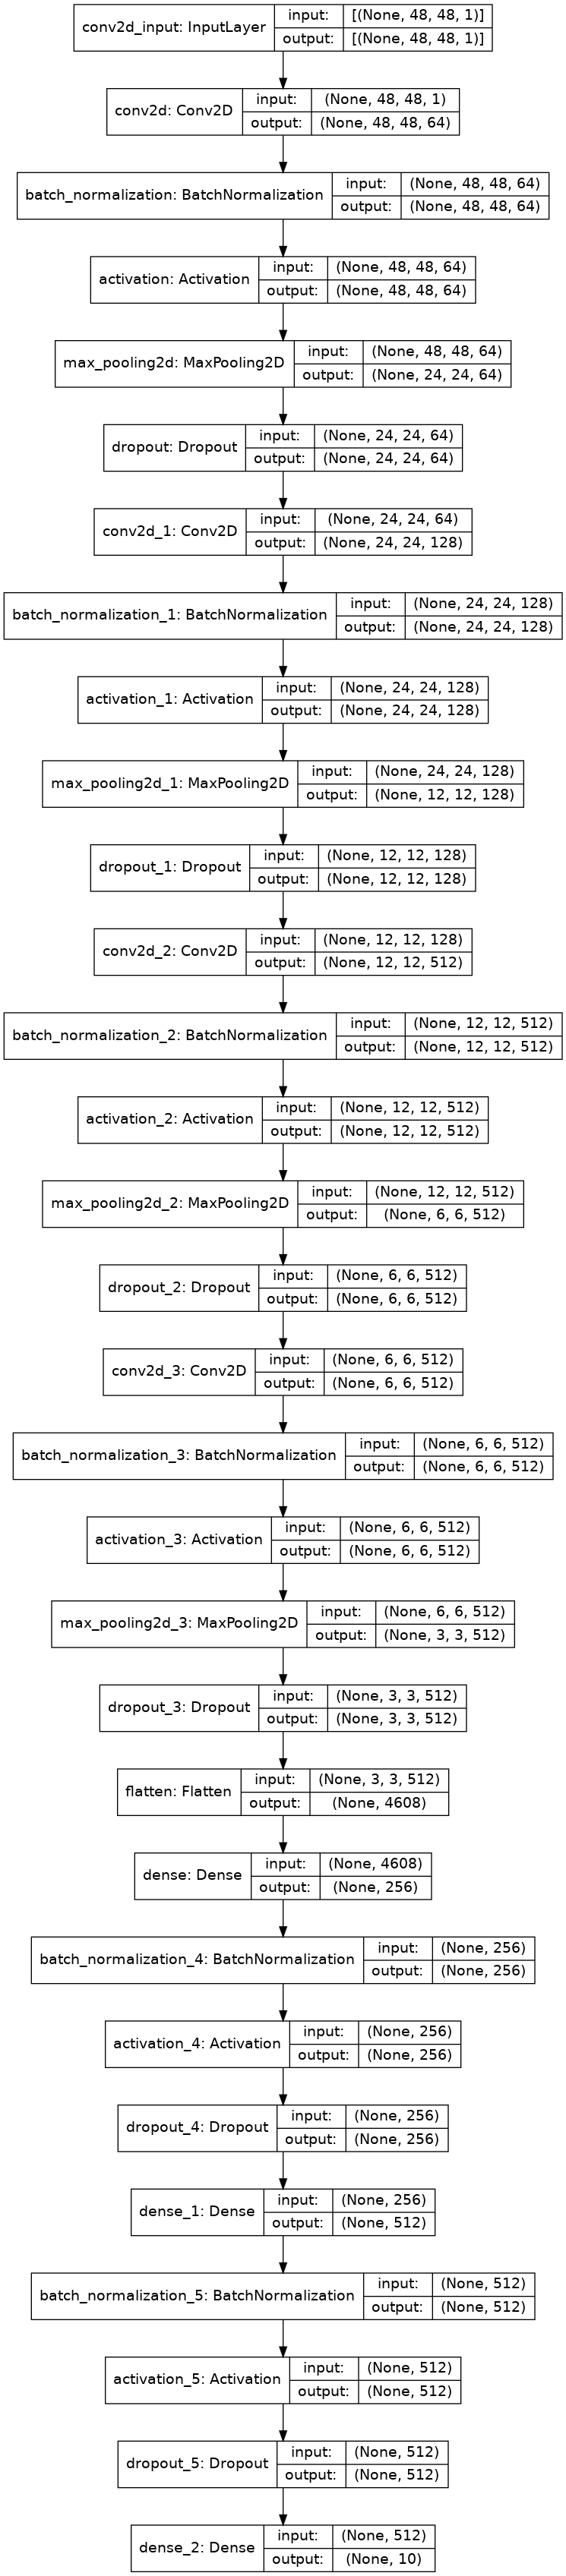

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)